In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv


In [2]:
path='/kaggle/input/delhi-air-quality-dataset/final_dataset.csv'
df=pd.read_csv(path)
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [3]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [4]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


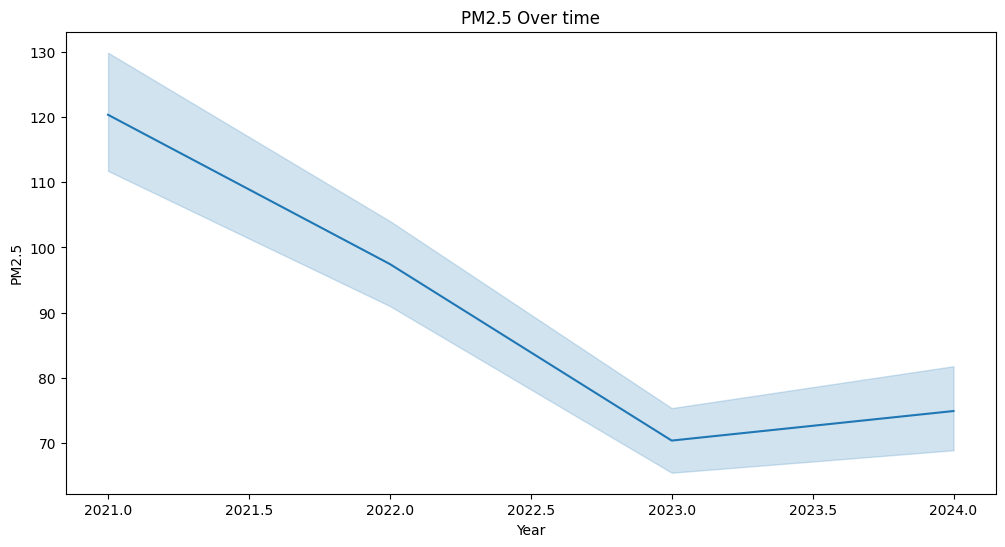

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 

#PM2.5 sns line plot 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,x="Year",y="PM2.5")
plt.title("PM2.5 Over time")
plt.show()


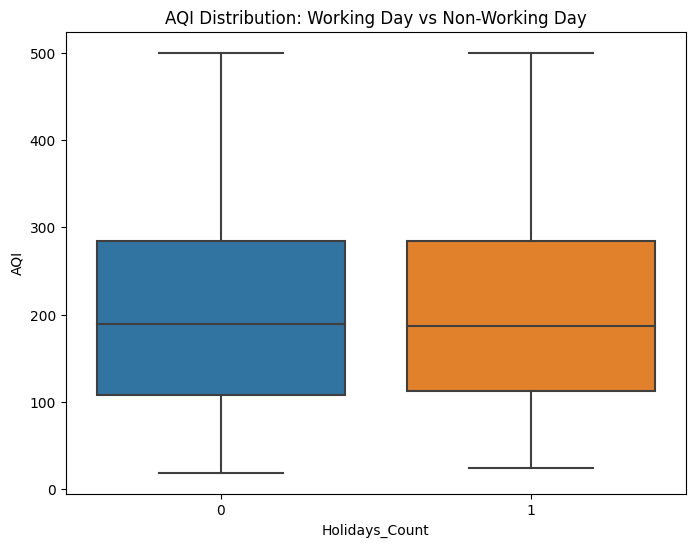

In [6]:
# Boxplot by working day
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Holidays_Count', y='AQI')
plt.title('AQI Distribution: Working Day vs Non-Working Day')
plt.show()

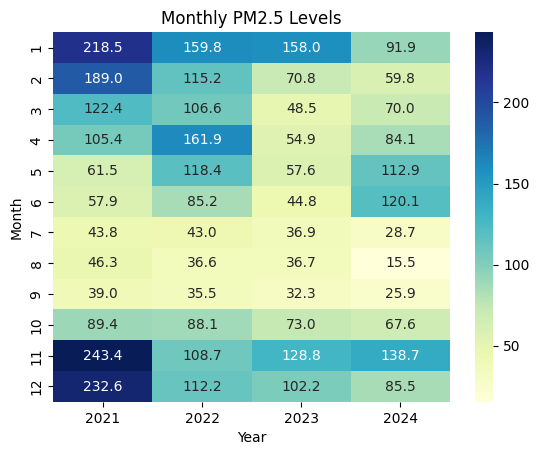

In [7]:
#PM2.5 monthly avergaes over time 
monthly_avg=df.groupby(['Month', 'Year'])[['PM2.5', 'PM10','NO2', 'SO2']].mean().unstack()
sns.heatmap(data=monthly_avg['PM2.5'],cmap='YlGnBu',annot=True,fmt='.1f')
plt.title('Monthly PM2.5 Levels')
plt.show()

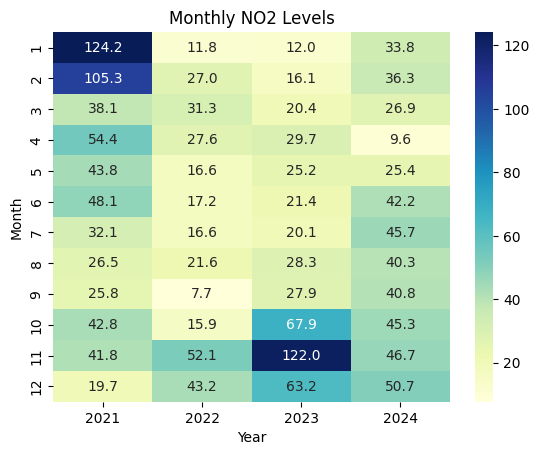

In [8]:
sns.heatmap(data=monthly_avg['NO2'],cmap='YlGnBu',annot=True,fmt='.1f')
plt.title('Monthly NO2 Levels')
plt.show()

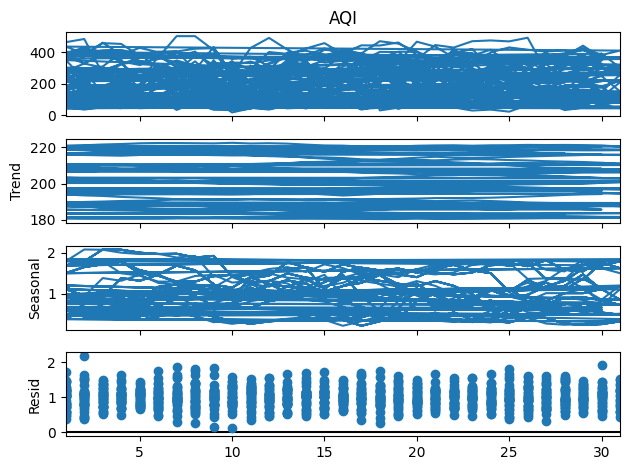

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Date',inplace=True)

result=seasonal_decompose(df["AQI"],model='multiplicative',period=365)
result.plot()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error 

# selcting the features and the values to predict 
features=['Holidays_Count', 'PM2.5', 'PM10','NO2', 'SO2', 'CO', 'Ozone']
X=df[features]
y=df['AQI']

# spliting the dataset 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#training the model 
model=RandomForestRegressor()
model.fit(X_train,y_train)

# predicting the model 
y_pred=model.predict(X_test)
print("RSME :",mean_squared_error(y_test,y_pred,squared=False))
print(model.score(X_test,y_test))

RSME : 29.13563595657141
0.9345834618566515
